<a href="https://colab.research.google.com/github/RatanNarayanHegde/GoogleColabFiles/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying to apply the resnet34 architecture of neural net for the classic image classification problem - 'Cats vs Dogs' 

Using the fastai library , which is the best wrapper library on top of pytorch

In [0]:
from fastai.vision import *

loading the dataset from local pc to colab

In [0]:
folder = 'cat'
file ='cats.csv'

In [0]:
folder = 'dog'
file ='dogs.csv'

In [0]:
path = Path('data/pets')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/pets/cleaned.csv'),
 PosixPath('data/pets/cats'),
 PosixPath('data/pets/cats.csv'),
 PosixPath('data/pets/dogs'),
 PosixPath('data/pets/dog'),
 PosixPath('data/pets/dogs.csv'),
 PosixPath('data/pets/cat'),
 PosixPath('data/pets/models')]

In [0]:
classes = ['dogs','cats']

In [0]:
download_images(path/file, dest, max_pics=200)

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dogs
cats


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['cat', 'dog']

Random Images From the dataset to test the data

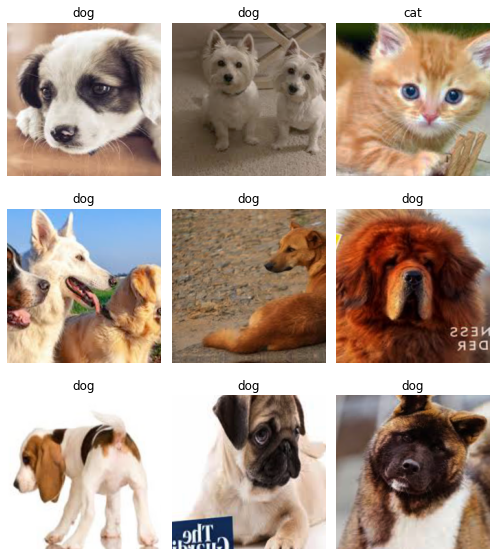

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['cat', 'dog'], 2, 192, 48)

Using the resnet34 model which as the name suggests has 34 hidden neural net layers

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.070390,0.070921,0.041667,00:04
1,0.044929,0.036075,0.020833,00:03
2,0.044649,0.031912,0.020833,00:04
3,0.058131,0.022775,0.020833,00:04


As you can see with only 192 training images and 4 epochs the model was able to get an accuracy of **98%** which is unheard of in classic machine learning algorithms

In [0]:
learn.save('stage-1')

Since this was a plain resnet with no alteration to the layers according to our needs . lets try to finetune the hyperparameters to acheive even greater accuracy

In [0]:
learn.unfreeze()


In [0]:
learn.lr_find()


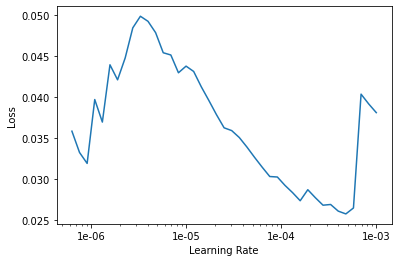

In [39]:
learn.recorder.plot()

We can see that the learning rate is steeply downward in around 3e-5 range 

In [48]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.056538,0.063425,0.041667,00:04
1,0.031122,0.031820,0.000000,00:04
2,0.020552,0.018052,0.000000,00:04
3,0.019584,0.009604,0.000000,00:04


 **100%** accuracy . This dataset is unfiltered and directly from google images so there might be some wrongly labeled data . 

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

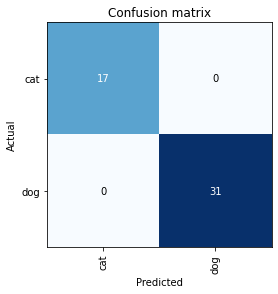

In [52]:
interp.plot_confusion_matrix()

Lets see which images were very hard for the model to distinguish

In [0]:
losses,idxs = interp.top_losses()

In [54]:
len(data.valid_ds)==len(losses)==len(idxs)

True

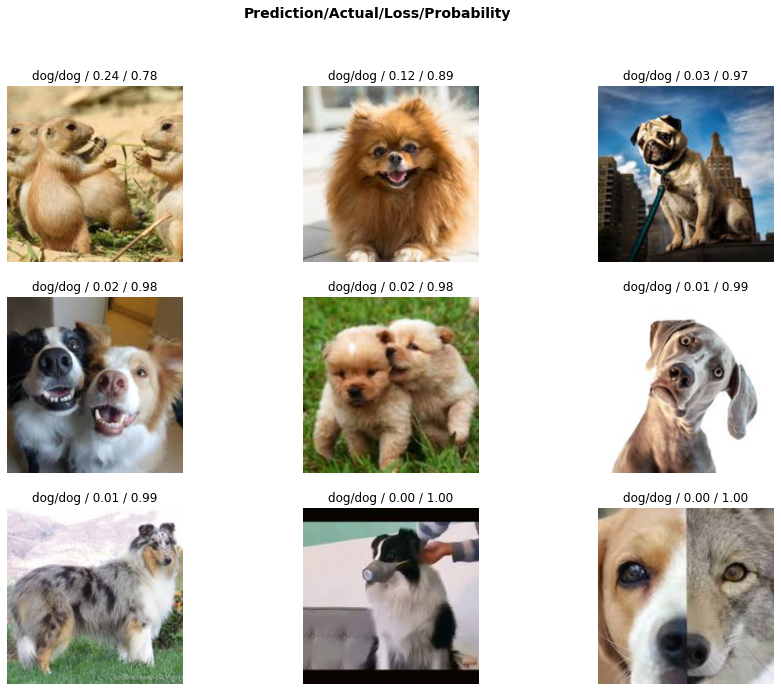

In [55]:
interp.plot_top_losses(9, figsize=(15,11))

As you can see the hardest one for it was a wrongly labelled image(a squirrel) 